<h1 style="text-align: center">Computer Vision</h3>
<p style="text-align: justify;">Computer Vision adalah bidang kecerdasan buatan (AI) yang memungkinkan komputer dan sistem memperoleh informasi bermakna dari gambar digital, video, dan input visual lainnya — dan mengambil tindakan atau membuat rekomendasi berdasarkan informasi tersebut. Jika AI memungkinkan komputer untuk berpikir, computer vision memungkinkan mereka untuk melihat, mengamati, dan memahami.

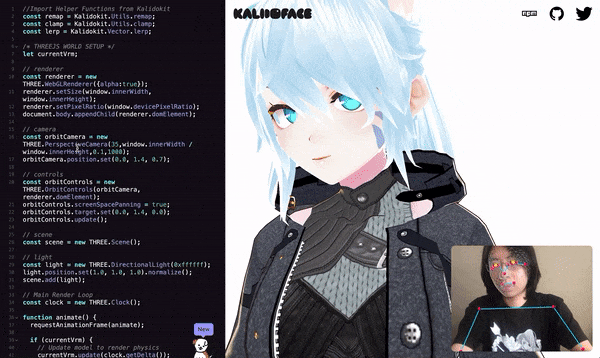

<h3>Menginstall dependecies/requirements/package/library yg diperlukan :</h3>
untuk menginstal library/package, menggunakan command pada terminal: <strong> pip install {libraryName} </strong>

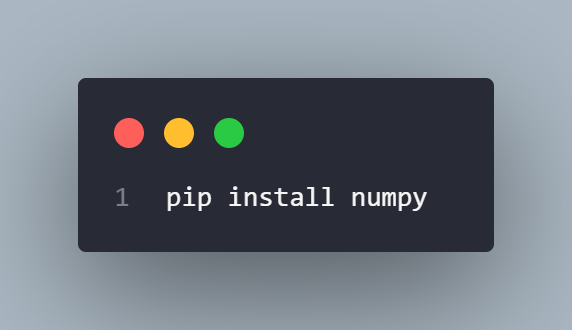

<h4>Menginstall library dasar computer vision</h4> 
- pip install opencv-python

OpenCV (Open Source Computer Vision Library) is an open-source computer vision and machine learning software library. It is widely used for various image and video processing tasks. OpenCV is written in C++ and has bindings for Python, making it accessible for developers using Python.

<h4>Read Image</h4>

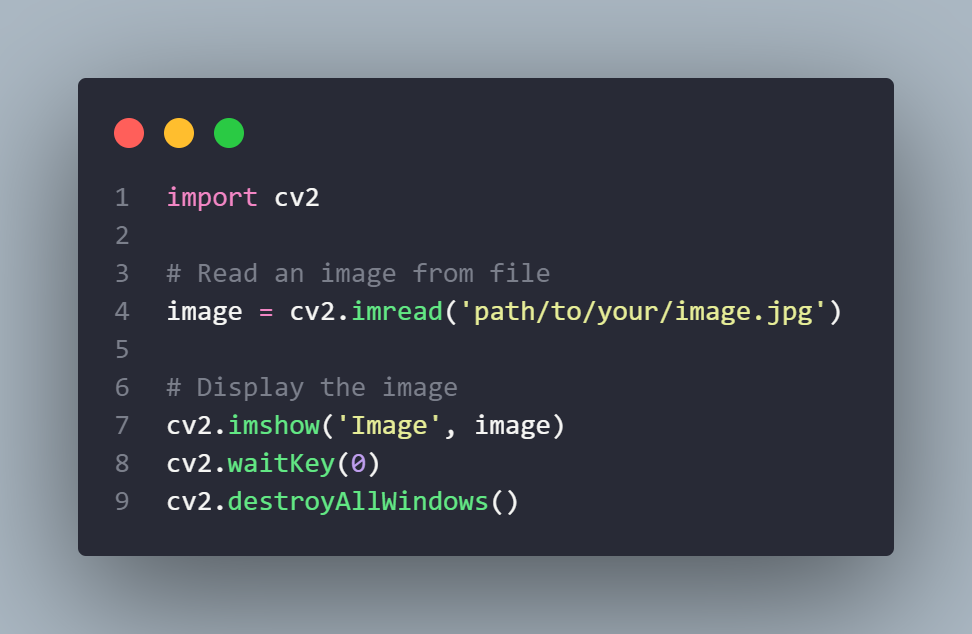

<h4>Read Video</h4>

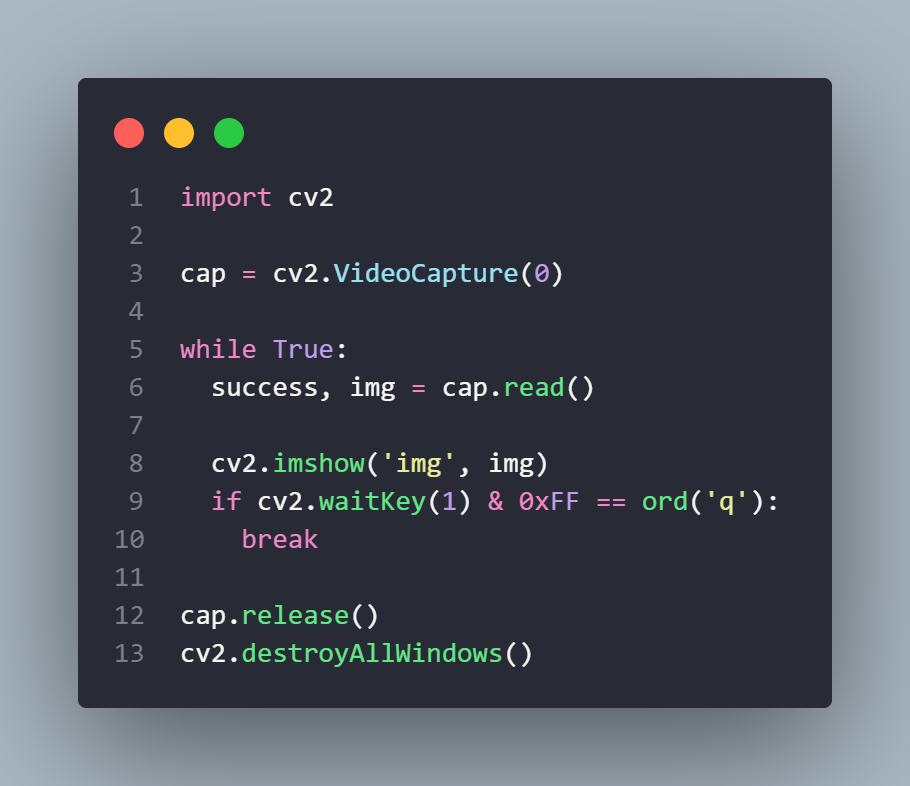

mengatur dimensi

In [ ]:
video.set(3, 720)
video.set(4, 720)

biki garis: <br>
cv2.line(frame, (x1, y1), (x2, y2), (RGB), tebal)

lingkaran : <br>
cv2.circle(frame,(x0,y0), radius, (BGR), tebal).

text : <br>
cv2.putText(img, "Hello World", (80, 50),font , 3,  (0,               	        0, 255), 3)

In [ ]:
import cv2

panjang = 1280
lebar = 720
video = cv2.VideoCapture(0)
video.set(3, panjang)
video.set(4, lebar)
while True:
  success, img = video.read()
  cv2.line(img, (0, 0), (panjang, lebar), (0, 255, 0), 3)
  cv2.circle(img, (int(panjang/2), int(lebar/2)), 25, (255, 0, 0), 12)
  cv2.putText(img, "Hello world", (int(panjang/2), int(lebar/2)), cv2.FONT_HERSHEY_PLAIN, 5, (0,0,255), 10)
  cv2.rectangle(img, (100, 100), (500, 500), (0, 255, 255), 4)
  cv2.imshow('video', img)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

video.release()
cv2.destroyAllWindows()

<h4>Membuat Project Human Detection</h4>
<p style="text-align: justify">kita tidak akan menggunakan algoritma kompleks dan dataset. Kita akan menggunakan library open source opencv CVZone yang memudahkan dalam Image Processing dan Fungsi AI. Cvzone pada pada dasarnya menggunakan library OpenCV dan Mediapipe.</p>

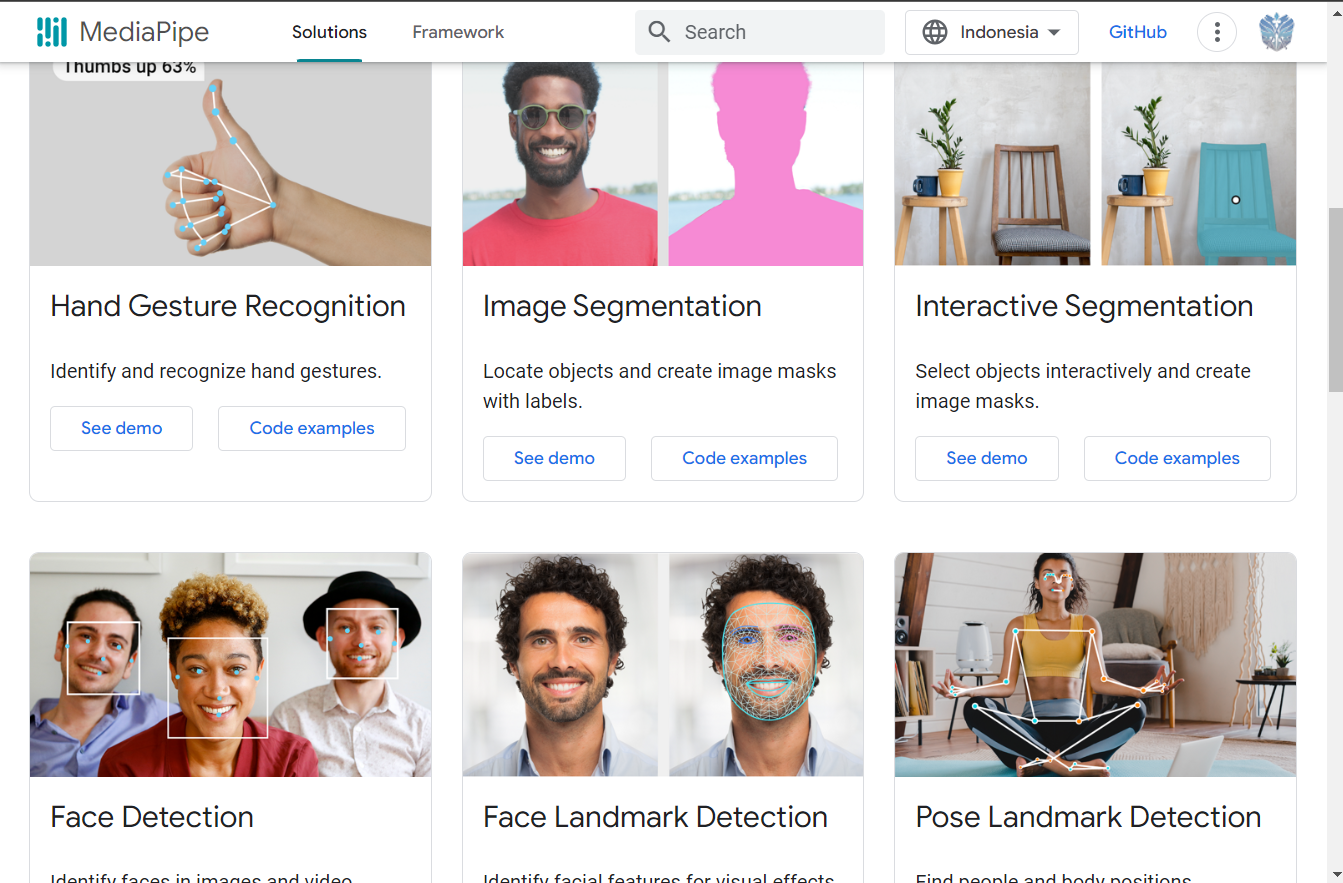

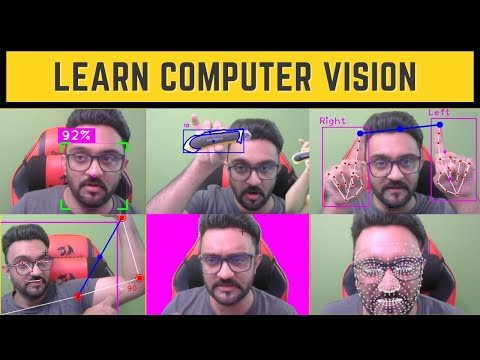

<h4>Menginstall Library CVZone dan Mediapipe : </h4>

Sebelum menginstall library MediaPipe terdapat prasyarat yang harus dipenuhi terlebih dahulu yakni menginstall beberapa library berikut.
- absl-py
- attrs>=19.1.0
- flatbuffers>=2.0
- matplotlib
- numpy
- opencv-contrib-python
- protobuf>=3.11,<4
- sounddevice>=0.4.4

Untuk menginstall library tersebut dengan instan, buat file requirements.txt masukkan text diatas ke file tersebut.


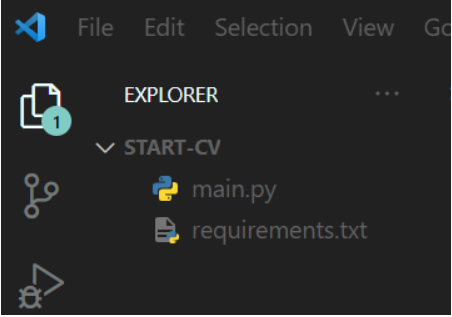

Lalu pada terminal masukkan command : <strong>pip install -r requirements.txt</strong>

Dengan sendirinya semua library tersebut akan terinstall dengan sendirinya. Setelah semua library tersebut terinstall, lanjutkan dengan menginstall library mediapipe dan dilanjutkan dengan menginstall library CVZone.

- pip install mediapipe
- pip install cvzone


<h3>Pose Detection</h3>

In [ ]:
from cvzone.PoseModule import PoseDetector
import cv2
import time

cap = cv2.VideoCapture(0)
detector = PoseDetector()
pTime = 0

while True:
  success, img = cap.read()
  img = detector.findPose(img)
  lmList, bboxInfo = detector.findPosition(img,bboxWithHands=False)
  if bboxInfo:	
    center = bboxInfo["center"]
    cv2.circle(img, center, 5, (255, 0, 255), cv2.FILLED)
	
  #frame
  cTime = time.time()
  fps = 1 / (cTime - pTime)
  pTime = cTime
  cv2.putText(img, f'{int(fps)}', (40, 50), cv2.FONT_HERSHEY_COMPLEX,
              1, (255, 0, 0), 3)

  cv2.imshow("Image", img)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()

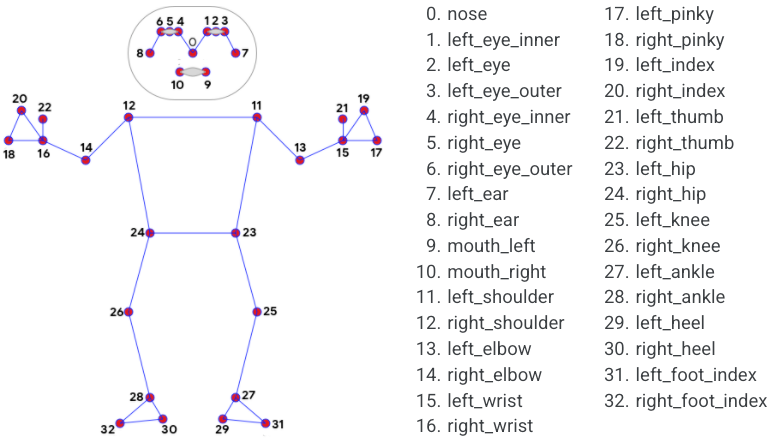

<h3>Hands Gesture Recognition</h3>

In [ ]:
from cvzone.HandTrackingModule import HandDetector
import cv2

cap = cv2.VideoCapture(0)
detector = HandDetector(detectionCon=0.8, maxHands=2)
while True:
  # Get image frame
  success, img = cap.read()
  # Find the hand and its landmarks
  hands, img = detector.findHands(img)  # with draw
  # hands = detector.findHands(img, draw=False)  

  if hands:
    # Hand 1
    hand1 = hands[0]
    # List of 21 Landmark points
    lmList1 = hand1["lmList"]
    # Bounding box info x,y,w,h 
    bbox1 = hand1["bbox"]  
    # center of the hand cx,cy
    centerPoint1 = hand1['center']
    # Handtype Left or Right  
    handType1 = hand1["type"]  

    fingers1 = detector.fingersUp(hand1)
    telunjuk = lmList1[8]
    x , y, z = telunjuk
    telunjukKanan = x, y
    x2, y2, z2 = lmList1[12]
    telunjuk2 = x2, y2
    print("x ", x)
    print("y ", y)
    if lmList1:
      length, info, img = detector.findDistance(telunjukKanan, telunjuk2, img)

    if len(hands) == 2:
      # Hand 2
      hand2 = hands[1]
      lmList2 = hand2["lmList"]  
      bbox2 = hand2["bbox"]  
      centerPoint2 = hand2['center'] 
      handType2 = hand2["type"]  

      fingers2 = detector.fingersUp(hand2)

  cv2.imshow("Image", img)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()


tombol virtual

In [ ]:
from cvzone.HandTrackingModule import HandDetector
import cv2

cap = cv2.VideoCapture(0)
detector = HandDetector(detectionCon=0.8, maxHands=2)
warna = (255,0,0)
while True:
  # Get image frame
  success, img = cap.read()
  # Find the hand and its landmarks
  hands, img = detector.findHands(img)  # with draw
  # hands = detector.findHands(img, draw=False)  

  if hands:
    # Hand 1
    hand1 = hands[0]
    # List of 21 Landmark points
    lmList1 = hand1["lmList"]
    # Bounding box info x,y,w,h 
    bbox1 = hand1["bbox"]  
    # center of the hand cx,cy
    centerPoint1 = hand1['center']
    # Handtype Left or Right  
    handType1 = hand1["type"]  

    fingers1 = detector.fingersUp(hand1)
    telunjuk = lmList1[8]
    x , y, z = telunjuk
    telunjukKanan = x, y
    x2, y2, z2 = lmList1[12]
    telunjuk2 = x2, y2
    
    if 100<=telunjukKanan[0]<=300 and 100<=telunjukKanan[1]<=300 :
      warna = (0, 255, 0)
    else:
      warna = (255,0,0)
    if lmList1:
      length, info, img = detector.findDistance(telunjukKanan, telunjuk2, img)

    if len(hands) == 2:
      # Hand 2
      hand2 = hands[1]
      lmList2 = hand2["lmList"]  
      bbox2 = hand2["bbox"]  
      centerPoint2 = hand2['center'] 
      handType2 = hand2["type"]  

      fingers2 = detector.fingersUp(hand2)
  
  
  cv2.rectangle(img , (100, 100), (300, 300), warna, -1)
  cv2.cir
  
  cv2.imshow("Image", img)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()


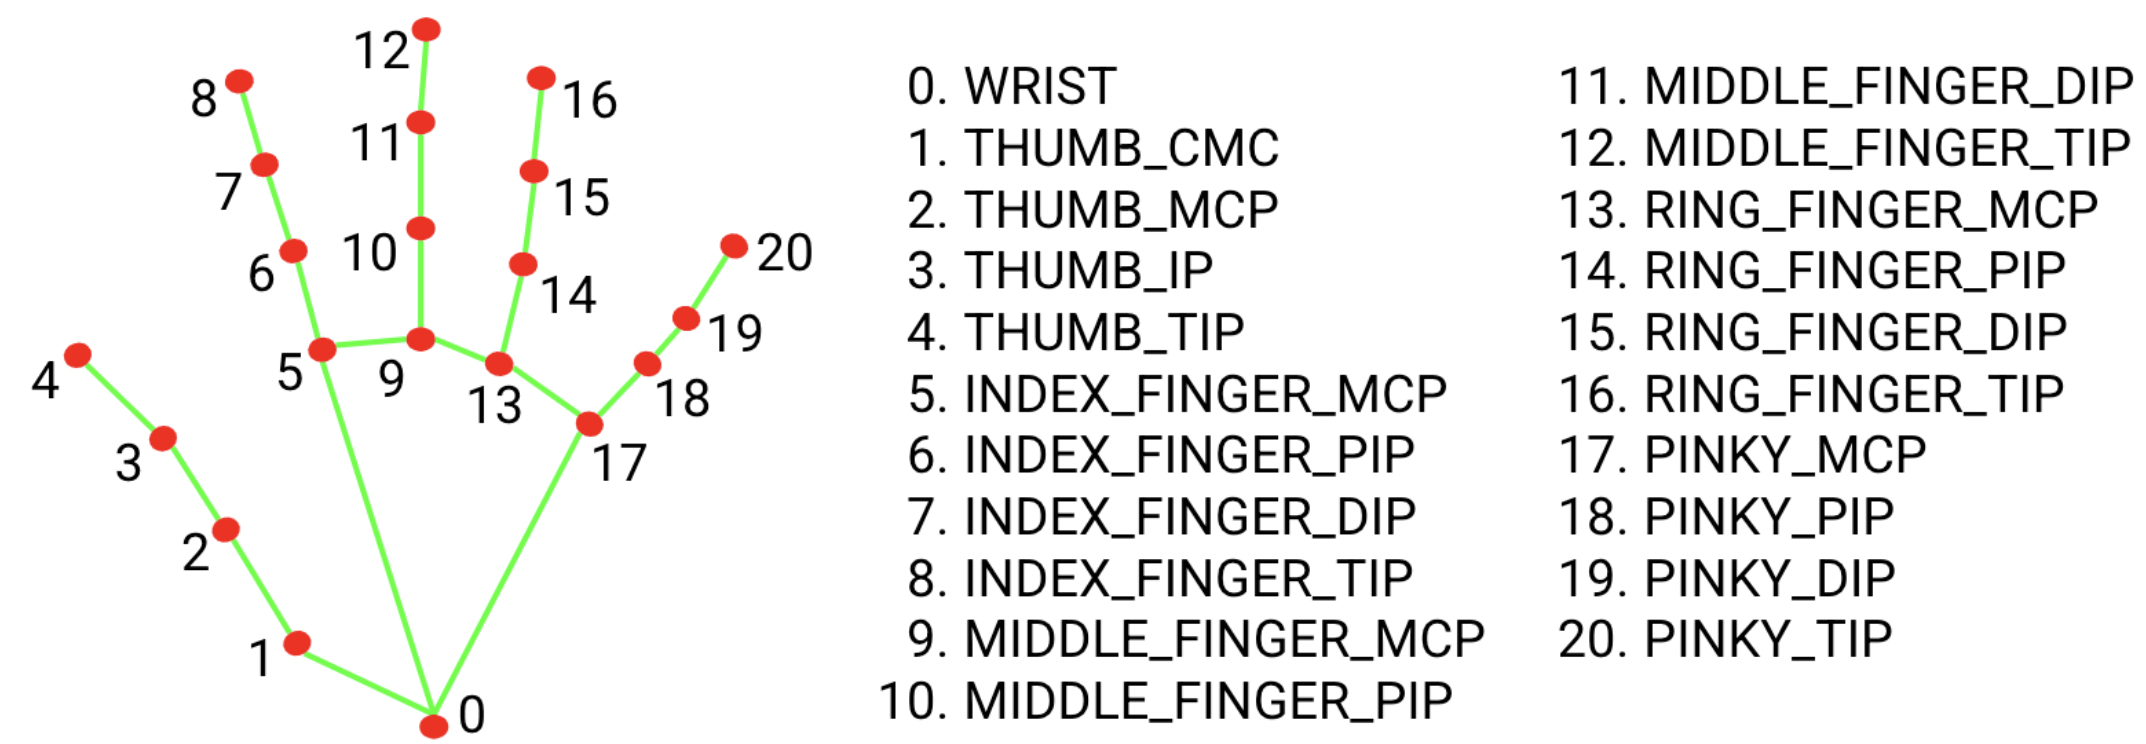

<h3>Face Detection</h3>

In [ ]:
from cvzone.FaceDetectionModule import FaceDetector
import cv2
import time

cap = cv2.VideoCapture(0)
detector = FaceDetector()
pTime = 0

while True:
  success, img = cap.read()
  img, bboxs = detector.findFaces(img)

  if bboxs:
    # bboxInfo - "id","bbox","score","center"
    center = bboxs[0]["center"]
    cv2.circle(img, center, 5, (255, 0, 255), cv2.FILLED)

  cTime = time.time()
  fps = 1 / (cTime - pTime)
  pTime = cTime
  cv2.putText(img, f'FPS: {int(fps)}', (40, 50), cv2.FONT_HERSHEY_SIMPLEX,
              1, (0, 255, 0), 3)

  cv2.imshow("Image", img)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
cap.release()

<h3>Face Landmark Detection</h3>

In [ ]:
from cvzone.FaceMeshModule import FaceMeshDetector
import cv2

cap = cv2.VideoCapture(0)
detector = FaceMeshDetector(maxFaces=2)
while True:
  success, img = cap.read()
  img, faces = detector.findFaceMesh(img)
  if faces:
    print(faces[0])
  cv2.imshow("Image", img)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()

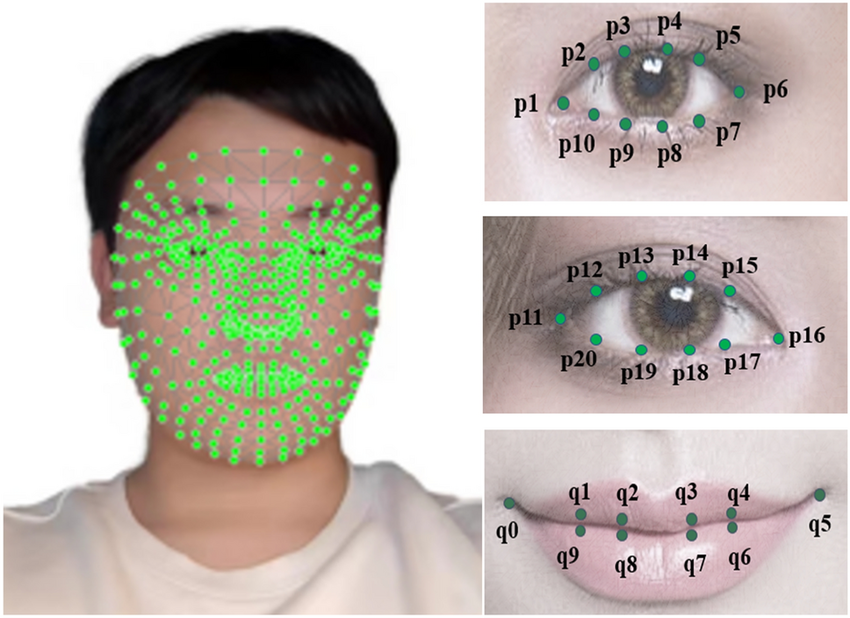